# Task1 text_class: Kaoutar Lakdim

# Importations

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data

In [ ]:

import pickle

with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)  # remove emails
    text = re.sub(r'\s+', ' ', text)        # remove newlines and extra spaces
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove punctuation and digits
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

cleaned_docs = [clean_text(doc) for doc in newsgroup_data]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 3: Vectorization
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(cleaned_docs)

# Step 4: Apply LDA
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(random_state=42)

In [ ]:
# Step 5: Display top 10 words per topic
def display_topics(model, feature_names, num_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_features
    return topics

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, num_top_words)

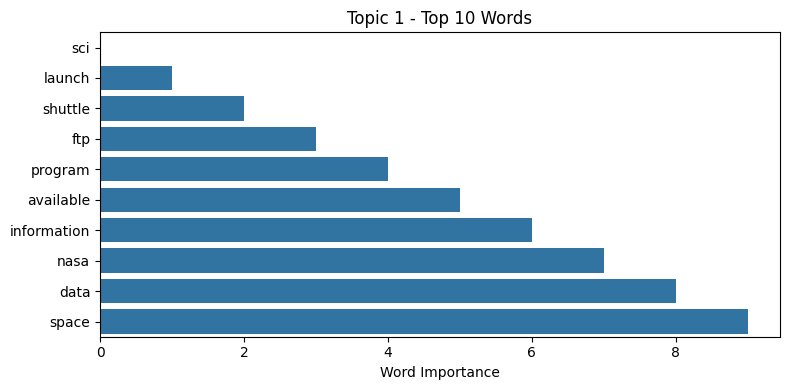

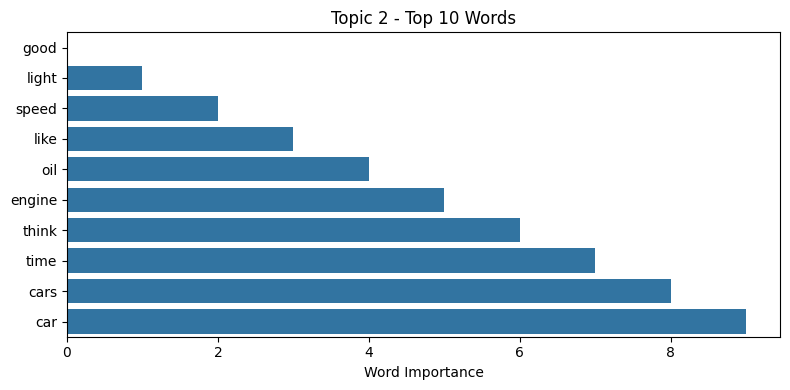

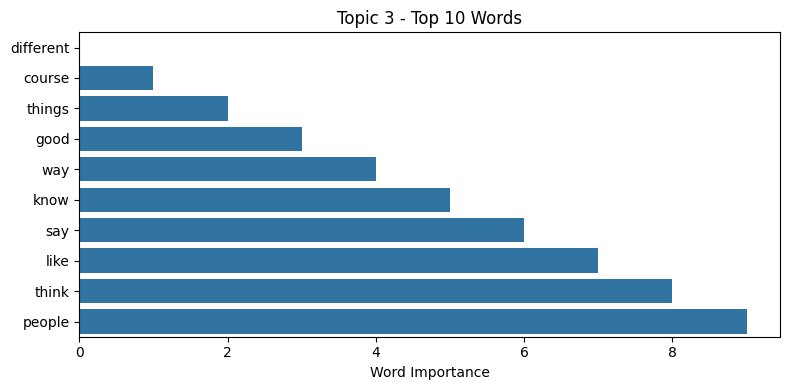

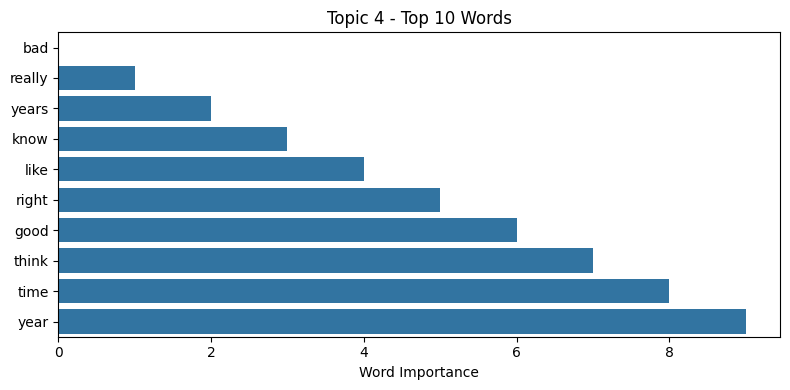

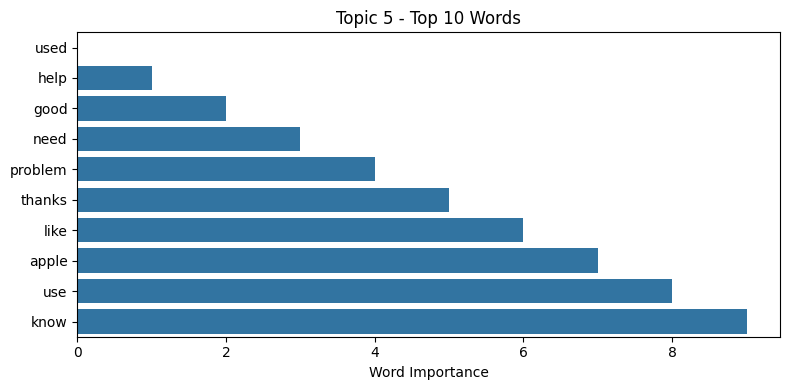

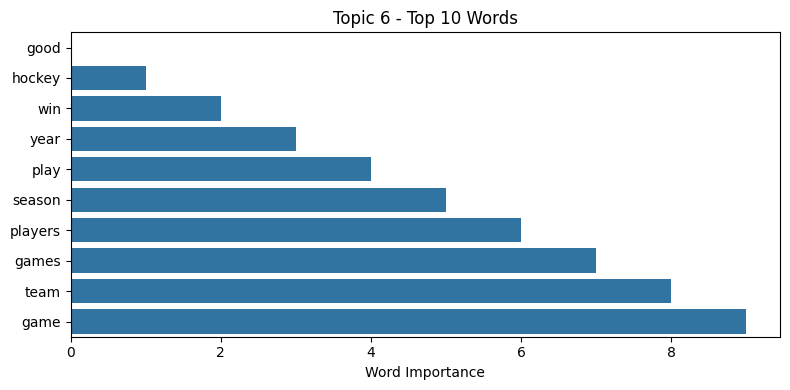

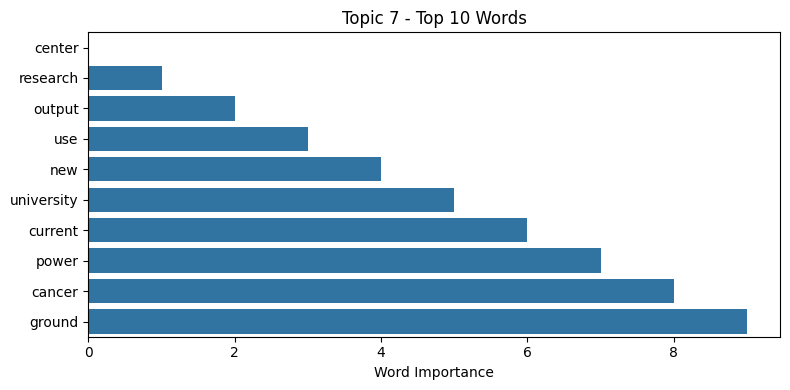

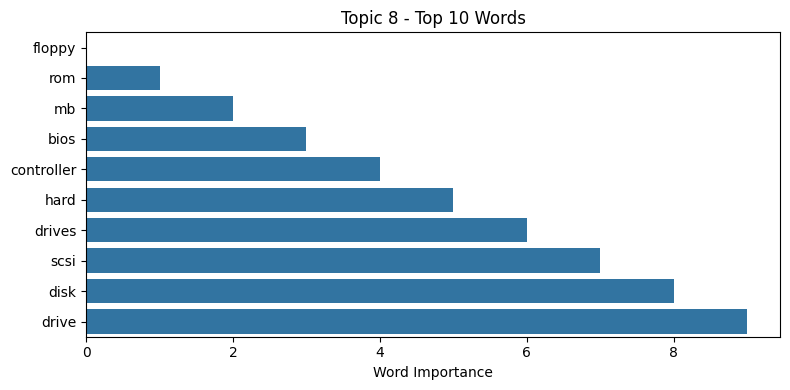

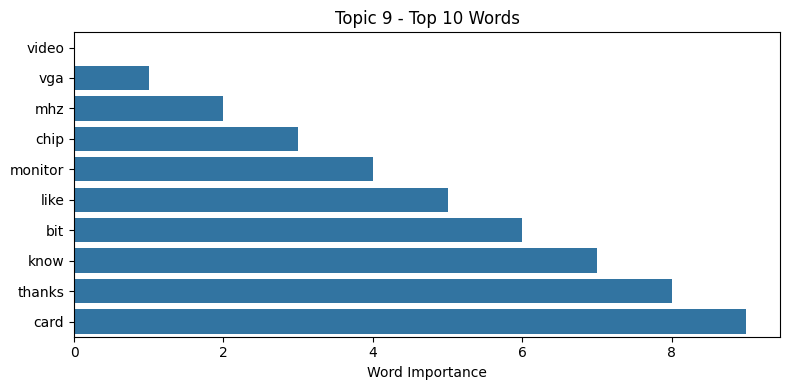

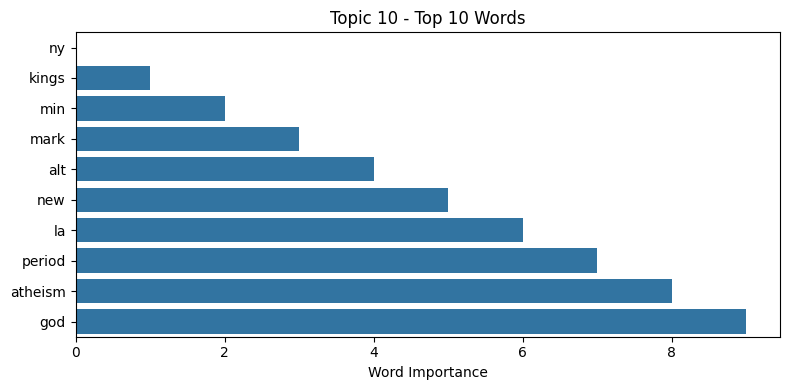

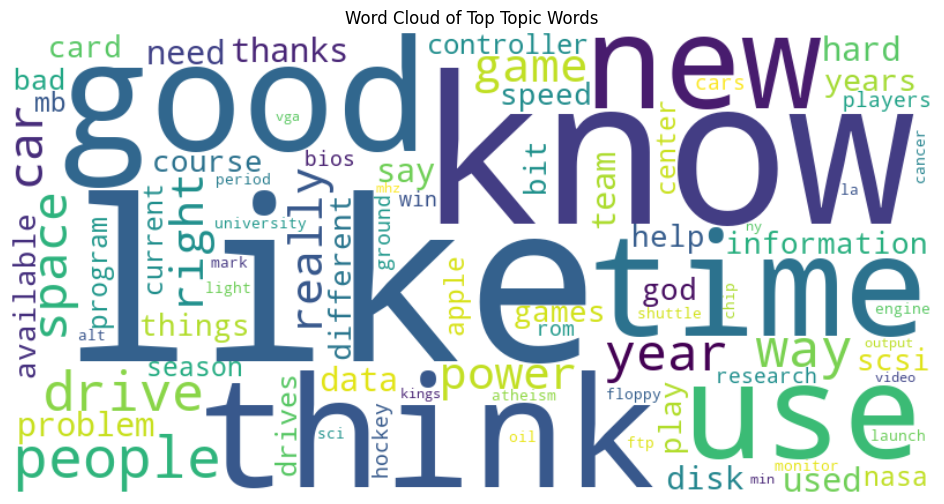

In [ ]:
# Plot top words per topic
for topic, words in topics.items():
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(range(num_top_words)), y=words[::-1])
    plt.title(f'{topic} - Top {num_top_words} Words')
    plt.yticks(ticks=range(num_top_words), labels=words[::-1])
    plt.xlabel('Word Importance')
    plt.tight_layout()
    plt.show()

# Step 6: Word Cloud of significant words
all_topics_words = set(word for words in topics.values() for word in words)
word_freq = {word: lda.components_[:, vectorizer.vocabulary_[word]].sum() for word in all_topics_words}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Top Topic Words")
plt.show()
